In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('/home/rafaelfabrichimidt/Documentos/Projetos/Python/codigos/case/analytics_engineer_carrefour/tutorial/CASE_PRATICO_SAMS_CLUB.csv')

In [6]:
print('Qtd de linhas = ', df.shape[0])
print('Qtd de colunas = ', df.shape[1])

Qtd de linhas =  878596
Qtd de colunas =  11


In [7]:
df.head()

,periodo,id_clube,socio,canal,ticket,departamento,item_id,item_descricao,item_unidade,receita_bruta,margem
0,2022-01-10,5235,45765100809381908,PISO,4576510080938190820220110,BAZAR E TÊXTIL,1259475,CALCAO,2,81.17,22.43
1,2022-01-10,5235,45766100903265726,PISO,4576610090326572620220110,BAZAR E TÊXTIL,1259475,CALCAO,1,41.27,11.90
2,2022-01-10,5235,45765100815078019,PISO,4576510081507801920220110,BAZAR E TÊXTIL,1225017,CHAPEU PRAIA,1,51.27,11.10
3,2022-01-10,5235,45766100904345030,PISO,4576610090434503020220110,BAZAR E TÊXTIL,1216504,BANCO DOBRAVEL,1,81.34,22.93
4,2022-01-10,5235,45766100903286284,PISO,4576610090328628420220110,BAZAR E TÊXTIL,1259473,BERMUDA MOLETOM,2,201.17,46.37


In [ ]:
receita_bruta = valor de venda
margem = lucro em cima da venda

In [12]:
df.dtypes

periodo            object
id_clube            int64
socio               int64
canal              object
ticket             object
departamento       object
item_id             int64
item_descricao     object
item_unidade        int64
receita_bruta     float64
margem            float64
dtype: object

In [14]:
df['periodo'] = pd.to_datetime(df['periodo'])

In [15]:
df['periodo'].unique()

<DatetimeArray>
['2022-01-10 00:00:00', '2022-01-11 00:00:00', '2022-01-12 00:00:00']
Length: 3, dtype: datetime64[ns]

In [9]:
df.nunique()

periodo               3
id_clube             42
socio             71889
canal                 2
ticket            75378
departamento          8
item_id           10661
item_descricao    10251
item_unidade        143
receita_bruta     16015
margem            13799
dtype: int64

In [10]:
df['canal'].unique()

array(['PISO', 'ECOM'], dtype=object)

In [11]:
df['departamento'].unique()

array(['BAZAR E TÊXTIL', 'BEBIDAS', 'PERECÍVEIS', 'MERCEARIA',
       'HIGIENE E LIMPEZA', 'COMMODITIES', 'ELETRO', 'SERVICO DIGITAL'],
      dtype=object)

In [79]:
df['%_lucro'] = (df['margem'] / df['receita_bruta']) * 100

In [81]:
df.describe()

/home/rafaelfabrichimidt/Documentos/Projetos/Python/codigos/case/analytics_engineer_carrefour/env/env/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,periodo,id_clube,socio,item_id,item_unidade,receita_bruta,margem,%_lucro
count,878596,878596.000000,8.785960e+05,8.785960e+05,878596.000000,878596.000000,878596.000000,8.785960e+05
mean,2022-01-11 00:35:30.803235840,6308.761837,4.575835e+16,1.232072e+06,1.477983,32.646677,5.576704,inf
min,2022-01-10 00:00:00,5235.000000,4.574401e+16,1.215153e+06,-425.000000,-16781.880000,-9445.030000,-2.077101e+05
25%,2022-01-10 00:00:00,6059.000000,4.575210e+16,1.222549e+06,1.000000,11.360000,2.230000,1.589506e+01
50%,2022-01-11 00:00:00,6169.000000,4.575222e+16,1.230923e+06,1.000000,19.270000,4.110000,2.481256e+01
75%,2022-01-12 00:00:00,6183.000000,4.576510e+16,1.236365e+06,1.000000,33.360000,7.470000,3.226048e+01
max,2022-01-12 00:00:00,7780.000000,4.576610e+16,1.268287e+06,1092.000000,34006.250000,6291.290000,inf
std,NaN,665.253679,6.793028e+12,1.298008e+04,3.228101,110.421399,26.760466,NaN


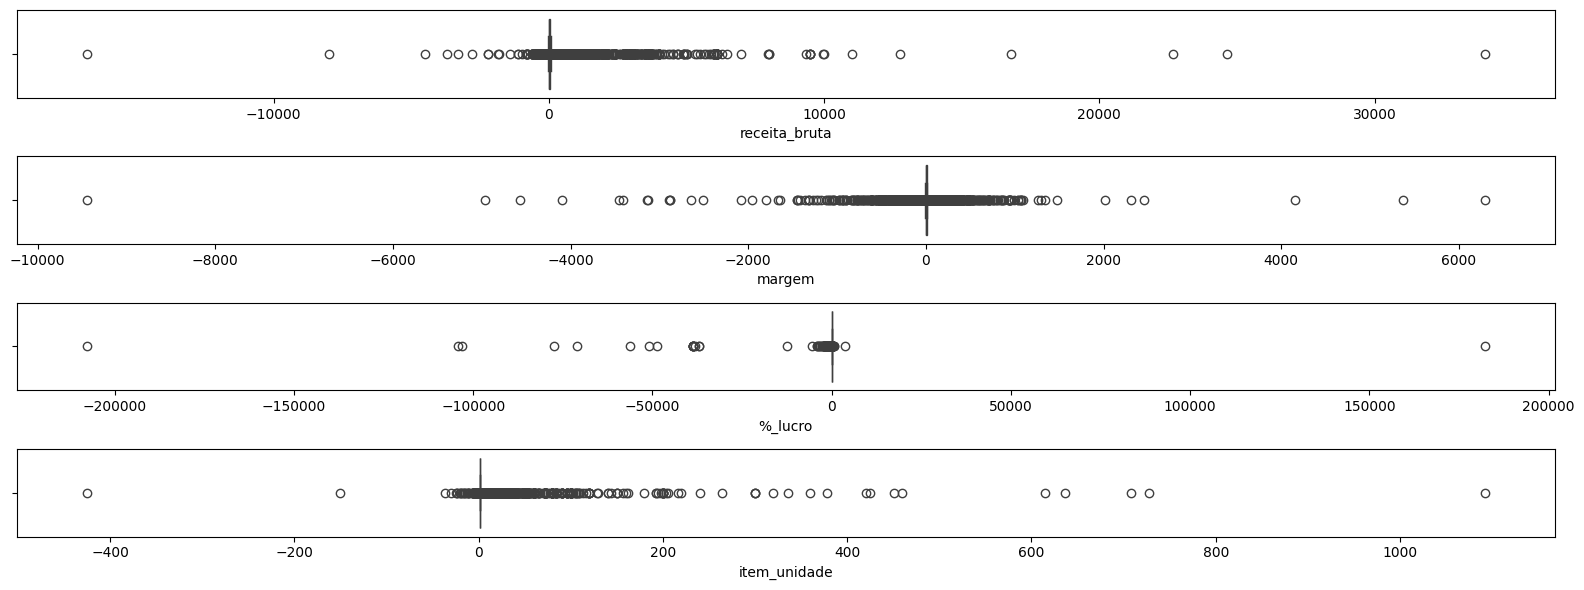

In [102]:
fig, ax = plt.subplots(nrows = 4, figsize = (16, 6))

sns.boxplot(x = df['receita_bruta'], ax = ax[0])
sns.boxplot(x = df['margem'], ax = ax[1])
sns.boxplot(x = df['%_lucro'], ax = ax[2])
sns.boxplot(x = df['item_unidade'], ax = ax[3])

fig.tight_layout()

In [110]:
qtd_de_items_negativo = df[df['item_unidade'] < 0].shape[0]

print('qtd de items negativos {} representa {} % do total'.format(qtd_de_items_negativo,
                                                                        round((qtd_de_items_negativo/ df.shape[0])*100, 3)))

qtd de items negativos 1156 representa 0.132 % do total


In [111]:
df = df[df['item_unidade'] > 0]

In [113]:
df.describe()

,periodo,id_clube,socio,item_id,item_unidade,receita_bruta,margem,%_lucro
count,874860,874860.000000,8.748600e+05,8.748600e+05,874860.000000,874860.000000,874860.000000,874860.000000
mean,2022-01-11 00:35:55.012688128,6308.938717,4.575835e+16,1.232061e+06,1.487015,32.970982,5.615942,19.741867
min,2022-01-10 00:00:00,5235.000000,4.574401e+16,1.215153e+06,1.000000,-42.710000,-9445.030000,-207710.071942
25%,2022-01-10 00:00:00,6059.000000,4.575210e+16,1.222549e+06,1.000000,11.360000,2.250000,15.870509
50%,2022-01-11 00:00:00,6169.000000,4.575222e+16,1.230908e+06,1.000000,19.340000,4.130000,24.777518
75%,2022-01-12 00:00:00,6183.000000,4.576510e+16,1.236365e+06,1.000000,33.660000,7.480000,32.199473
max,2022-01-12 00:00:00,7780.000000,4.576610e+16,1.268287e+06,1092.000000,34006.250000,6291.290000,3721.052632
std,NaN,665.236269,6.792586e+12,1.297185e+04,3.194438,108.254386,26.585977,335.349732


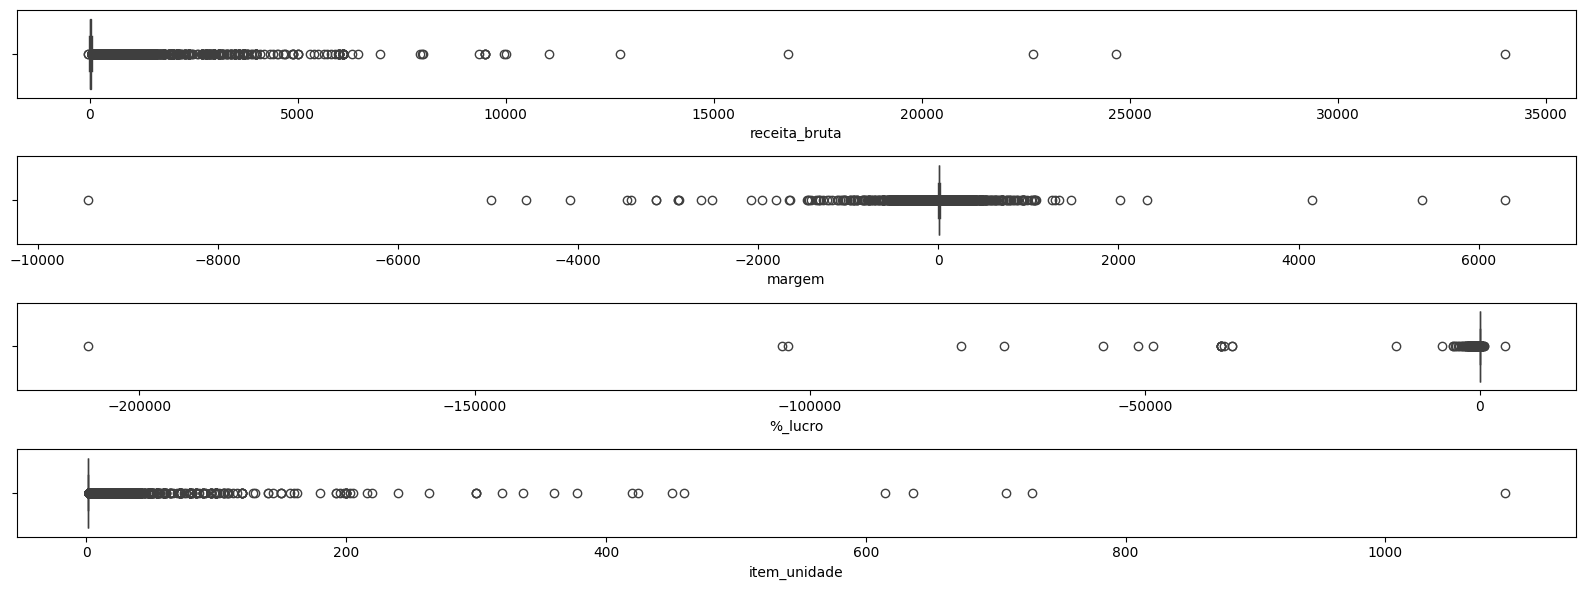

In [112]:
fig, ax = plt.subplots(nrows = 4, figsize = (16, 6))

sns.boxplot(x = df['receita_bruta'], ax = ax[0])
sns.boxplot(x = df['margem'], ax = ax[1])
sns.boxplot(x = df['%_lucro'], ax = ax[2])
sns.boxplot(x = df['item_unidade'], ax = ax[3])

fig.tight_layout()

In [98]:
df.head(2)

,periodo,id_clube,socio,canal,ticket,departamento,item_id,item_descricao,item_unidade,receita_bruta,margem,%_lucro
0,2022-01-10,5235,45765100809381908,PISO,4576510080938190820220110,BAZAR E TÊXTIL,1259475,CALCAO,2,81.17,22.43,27.633362
1,2022-01-10,5235,45766100903265726,PISO,4576610090326572620220110,BAZAR E TÊXTIL,1259475,CALCAO,1,41.27,11.90,28.834504


In [68]:
df.groupby(['item_descricao'])['item_unidade'].sum().sort_values(ascending = False)[0:10]

item_descricao
SACOLA PLASTICA MM BRANCA              29174
SACOLA PLASTICA MM CINZA                8214
PAPEL TOALHA KITCHEN JUMB FD C360FL     7638
SACOLA PLASTICA MM VERDE                7561
CR DE LEITE PIRACANJUBA TP 200G         7320
OLEO SOJA LIZA PET 900ML                6913
CERV QUILMES CLASSICA LN 340ML          5891
PAPEL REPORT MULT A4 BRANCO 500 F       5868
ACUC REF UNIAO 1KG                      5658
MM LAVA ROUPAS 5LTS ULTIMATE CLEAN      5272
Name: item_unidade, dtype: int64

In [114]:
_10_maiores_items_em_qtd = df.groupby(['item_descricao'])['item_unidade'].sum().sort_values(ascending = False)[0:10].keys()

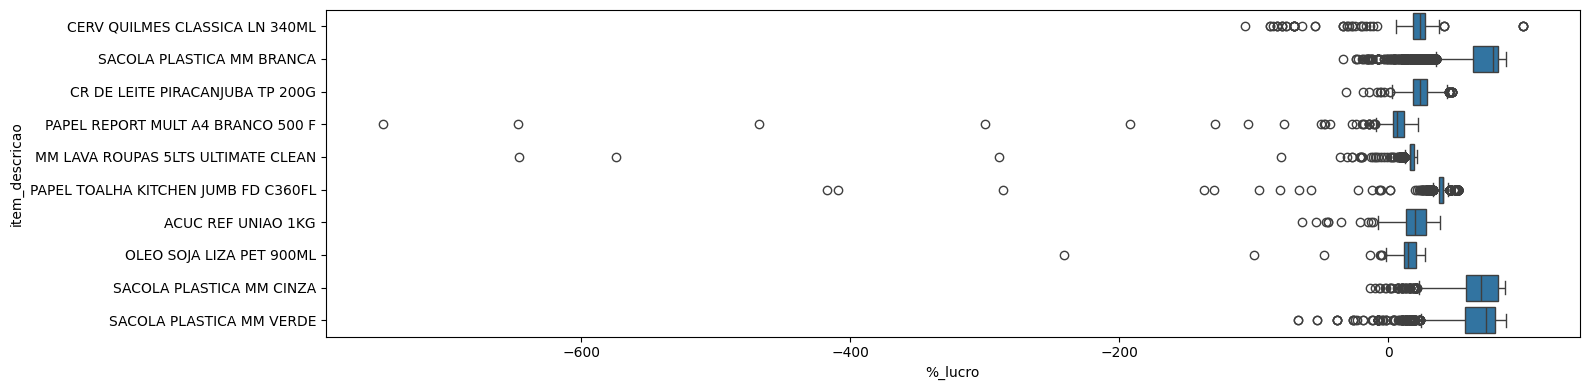

In [115]:
df_aux = df[df['item_descricao'].isin(_10_maiores_items_em_qtd)]

fig, ax = plt.subplots(figsize = (16, 4))

sns.boxplot(x = df_aux['%_lucro'], y = df_aux['item_descricao'], ax = ax)

fig.tight_layout()

In [117]:
df.head()

,periodo,id_clube,socio,canal,ticket,departamento,item_id,item_descricao,item_unidade,receita_bruta,margem,%_lucro
0,2022-01-10,5235,45765100809381908,PISO,4576510080938190820220110,BAZAR E TÊXTIL,1259475,CALCAO,2,81.17,22.43,27.633362
1,2022-01-10,5235,45766100903265726,PISO,4576610090326572620220110,BAZAR E TÊXTIL,1259475,CALCAO,1,41.27,11.90,28.834504
2,2022-01-10,5235,45765100815078019,PISO,4576510081507801920220110,BAZAR E TÊXTIL,1225017,CHAPEU PRAIA,1,51.27,11.10,21.650088
3,2022-01-10,5235,45766100904345030,PISO,4576610090434503020220110,BAZAR E TÊXTIL,1216504,BANCO DOBRAVEL,1,81.34,22.93,28.190312
4,2022-01-10,5235,45766100903286284,PISO,4576610090328628420220110,BAZAR E TÊXTIL,1259473,BERMUDA MOLETOM,2,201.17,46.37,23.050157


In [122]:
df.groupby(['socio'])[['item_unidade', 'receita_bruta', 	'margem']].sum().sort_values(by = 'item_unidade')

,item_unidade,receita_bruta,margem
socio,,,
45752230208274746,1,62.07,-24.85
45765100805623030,1,38.28,19.54
45752210201218047,1,38.36,12.99
45752100215440389,1,11.35,4.47
45766100901931717,1,190.37,57.21
...,...,...,...
45765100811322197,711,24672.28,5344.03
45765100805708294,728,22671.29,4150.97
45765100807966023,902,8318.65,-13859.01


In [123]:
df[df['socio'] == 45752200200689222]

,periodo,id_clube,socio,canal,ticket,departamento,item_id,item_descricao,item_unidade,receita_bruta,margem,%_lucro
38,2022-01-10,5235,45752200200689222,PISO,4575220020068922220220110,BAZAR E TÊXTIL,1216840,KIT FRESCOBOL LK SPEEDO,1,51.36,9.50,18.496885
805,2022-01-10,5235,45752200200689222,PISO,4575220020068922220220110,PERECÍVEIS,1232289,IOGURTE NESTLE VIT DE FRUTAS 1250G,1,12.46,3.57,28.651685
951,2022-01-10,5235,45752200200689222,PISO,4575220020068922220220110,PERECÍVEIS,1232922,BROCOLIS 1KG DAUCY,1,5.26,-3.54,-67.300380
1568,2022-01-10,5235,45752200200689222,PISO,4575220020068922220220110,PERECÍVEIS,1235729,RAGGU PERNIL SUINO CONGELADO,2,11.35,-0.03,-0.264317
2562,2022-01-10,5235,45752200200689222,PISO,4575220020068922220220110,HIGIENE E LIMPEZA,1225302,CONDICIONADOR CAVALO FORTE 1L HASKE,1,41.28,-26.02,-63.032946
...,...,...,...,...,...,...,...,...,...,...,...,...
877902,2022-01-12,7780,45752200200689222,PISO,4575220020068922220220112,HIGIENE E LIMPEZA,1265449,SAB LIQ PALMOLIVE CAMELIA RF 900ML,1,18.36,4.54,24.727669
878139,2022-01-12,7780,45752200200689222,PISO,4575220020068922220220112,HIGIENE E LIMPEZA,1229270,ESPONJA SB NAO RISCA C10/UNID SCOTC,1,23.35,7.98,34.175589
878454,2022-01-12,7780,45752200200689222,PISO,4575220020068922220220112,HIGIENE E LIMPEZA,1215794,PAPEL TOALHA KITCHEN JUMB FD C360FL,1,15.96,6.45,40.413534
878573,2022-01-12,7780,45752200200689222,PISO,4575220020068922220220112,HIGIENE E LIMPEZA,1218511,VEJA LAVANDA 4LT LIMPADOR PERFUMADO,1,28.36,12.64,44.569817


In [129]:
pd.pivot_table(df, index = 'socio', columns = 'item_descricao', values = 'item_unidade')

item_descricao,.AGUA SANITARIA 6X1L SUPER GLOBO,.BAYGON AERO 12X360ML,.CAFE TRES CORACOES ALM TRAD 500G,.COMFORT 6X2LTS AMACIANTE CLASSIC,.DET YPE 24X500 ML NEUTRO,.DET YPE 24X500ML CLEAR,".DOWNY CONC LIRIOS CAMPO 1,5LT",.LIMPOL 24X500ML DETERG LIQ CRISTAL,.LIMPOL 24X500ML DETERG LIQ NEUTRO,.LIMPOL LIQ 24X500ML DETERG LIQ COC,...,YPE BAK LAVANDA DESINFETANTE 5LT,YPE CONCENTRAD BLUE AMACIANTE 1.5LT,YPE GLICERINADO 5X200GR,YPE LIQ 6X500ML DETERG LIQ CLEAR,YPE LIQ 6X500ML DETERG LIQ MACA,YPE LIQ 6X500ML DETERG LIQ NEUTRO,YPE LV5LT PG 4.5LT DETERG P/ LOUCA,YPE PAGUE 4.5LT AMAC DILUIDO 5LTS,ZAMIOCULCA P20 PT 20,ZAMIOCULCAS P19
socio,,,,,,,,,,,,,,,,,,,,,
45744010182687962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45744010189418627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45744010190519165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45744010192096329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45744010193486305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45766100906967898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45766100906967989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45766100906968300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['item_unidade'] < 0]

In [97]:
df[df['item_unidade'] < 0].shape

(1156, 12)

In [92]:
df.groupby(['item_descricao'])['%_lucro'].median().sort_values(ascending = False)[0:10]

item_descricao
ARCON 9000BTU LG EX Q/F INVERTER    182196.296296
CAPSULAS ESPRESSO BRASILEIRO C10       100.000000
PEPINO JAPONES BANDEJA 500G            100.000000
PRIME MATURATTA                        100.000000
VHO CATENA ROSE MALBEC 750ML           100.000000
FRETE                                  100.000000
ERVILHA BANDEJA 250G                   100.000000
POLPA GOIABA POMAR 1KG                 100.000000
ACELGA UNID                            100.000000
VEJA LIMPEZA PESADA CLORO 1LT          100.000000
Name: %_lucro, dtype: float64

In [93]:
df.groupby(['item_descricao'])['%_lucro'].mean().sort_values(ascending = False)[0:10]

item_descricao
ROSCA SABOR COCO 700G                           inf
ARCON 9000BTU LG EX Q/F INVERTER       1.821963e+05
ALFACE AMERICANA BDJ 500G              1.000000e+02
BEB SOJA ADES PESSEGO 6X1L             1.000000e+02
ARCON 12000BTU LG IN LK FRIO INVERT    1.000000e+02
KT PAMPERS CHA BB PREMIUM G30 LENCO    1.000000e+02
PASTEL QUEIJO C GOIABA SEQUI 12X40G    1.000000e+02
UVA RED GLOBE 500G                     1.000000e+02
FEIJOADA LG 500GR                      1.000000e+02
WHISKY DEWAR S 15 YEAR S 750ML         1.000000e+02
Name: %_lucro, dtype: float64

In [63]:
df.head()

,periodo,id_clube,socio,canal,ticket,departamento,item_id,item_descricao,item_unidade,receita_bruta,margem,%_lucro
0,2022-01-10,5235,45765100809381908,PISO,4576510080938190820220110,BAZAR E TÊXTIL,1259475,CALCAO,2,81.17,22.43,0.276334
1,2022-01-10,5235,45766100903265726,PISO,4576610090326572620220110,BAZAR E TÊXTIL,1259475,CALCAO,1,41.27,11.90,0.288345
2,2022-01-10,5235,45765100815078019,PISO,4576510081507801920220110,BAZAR E TÊXTIL,1225017,CHAPEU PRAIA,1,51.27,11.10,0.216501
3,2022-01-10,5235,45766100904345030,PISO,4576610090434503020220110,BAZAR E TÊXTIL,1216504,BANCO DOBRAVEL,1,81.34,22.93,0.281903
4,2022-01-10,5235,45766100903286284,PISO,4576610090328628420220110,BAZAR E TÊXTIL,1259473,BERMUDA MOLETOM,2,201.17,46.37,0.230502


In [67]:
df[df['item_descricao'] == 'SACOLA PLASTICA MM BRANCA'].sort_values(by = 'item_unidade', ascending = False).head(10)

,periodo,id_clube,socio,canal,ticket,departamento,item_id,item_descricao,item_unidade,receita_bruta,margem,%_lucro
775836,2022-01-12,6175,45765100801936170,PISO,4576510080193617020220112,HIGIENE E LIMPEZA,1236279,SACOLA PLASTICA MM BRANCA,203,56.18,-7.46,-0.132787
794023,2022-01-12,6178,45752210201654456,PISO,4575221020165445620220112,HIGIENE E LIMPEZA,1236279,SACOLA PLASTICA MM BRANCA,100,27.97,-9.49,-0.339292
558596,2022-01-11,7700,45752100190570408,PISO,4575210019057040820220111,HIGIENE E LIMPEZA,1236279,SACOLA PLASTICA MM BRANCA,60,17.57,2.95,0.167900
162904,2022-01-10,6171,45752100219171238,PISO,4575210021917123820220110,HIGIENE E LIMPEZA,1236279,SACOLA PLASTICA MM BRANCA,60,17.57,-4.25,-0.241890
451908,2022-01-11,6171,45744100218753713,PISO,4574410021875371320220111,HIGIENE E LIMPEZA,1236279,SACOLA PLASTICA MM BRANCA,60,17.57,-4.24,-0.241320
208035,2022-01-10,6181,45752210220497275,PISO,4575221022049727520220110,HIGIENE E LIMPEZA,1236279,SACOLA PLASTICA MM BRANCA,60,17.57,2.52,0.143426
656252,2022-01-12,6091,45766100902898907,PISO,4576610090289890720220112,HIGIENE E LIMPEZA,1236279,SACOLA PLASTICA MM BRANCA,50,14.87,3.69,0.248151
441071,2022-01-11,6170,45752140195484399,PISO,4575214019548439920220111,HIGIENE E LIMPEZA,1236279,SACOLA PLASTICA MM BRANCA,50,14.87,-2.81,-0.188971
208052,2022-01-10,6181,45752100209120021,PISO,4575210020912002120220110,HIGIENE E LIMPEZA,1236279,SACOLA PLASTICA MM BRANCA,50,14.87,2.32,0.156019
406179,2022-01-11,6166,45752110203678396,PISO,4575211020367839620220111,HIGIENE E LIMPEZA,1236279,SACOLA PLASTICA MM BRANCA,50,14.87,2.69,0.180901


In [58]:
round(df['receita_bruta'].sum(),2)


28683239.96

In [57]:
round(df['margem'].sum(), 2)

4899669.54

In [59]:
round(df['receita_bruta'].sum(),2) + round(df['margem'].sum(), 2)

33582909.5

In [43]:
df.groupby(['id_clu'])['item_unidade'].sum().sort_values(ascending = False)[0:10]

id_clube
6170    56205
6172    56095
7500    51878
6177    47321
6059    45954
6164    44998
5649    44741
6163    41847
6171    41055
6166    40607
Name: item_unidade, dtype: int64

In [25]:
df.groupby(['item_descricao'])['item_unidade'].sum().sort_values(ascending = False)[0:10]

item_descricao
SACOLA PLASTICA MM BRANCA              29174
SACOLA PLASTICA MM CINZA                8214
PAPEL TOALHA KITCHEN JUMB FD C360FL     7638
SACOLA PLASTICA MM VERDE                7561
CR DE LEITE PIRACANJUBA TP 200G         7320
OLEO SOJA LIZA PET 900ML                6913
CERV QUILMES CLASSICA LN 340ML          5891
PAPEL REPORT MULT A4 BRANCO 500 F       5868
ACUC REF UNIAO 1KG                      5658
MM LAVA ROUPAS 5LTS ULTIMATE CLEAN      5272
Name: item_unidade, dtype: int64

In [51]:
df[df['id_clube'] == 6170]['item_descricao'].unique()[0:50]

array(['BANCO DOBRAVEL', 'GIN APOGEE 1 L', 'CAMISETA ALGODAO',
       'ESCOVA SANITARIA', 'VESTIDO MC MENINA', 'CERV SKOL 12X473ML',
       'GIN HENDRICKS 750ML', 'AG MIN INDAIA S/G 5L',
       'CERV BRAHMA 12X473ML', 'COLETE PIRATA PIRATA',
       'KIT 3 CUECAS SLIP GG', 'MACACAO CURTO MENINA',
       'MARTINI BIANCO 750ML', 'POLO LEVIS MASCULINA',
       'TAPETE CHENILE BANHO', 'TRAVESSEIRO 400 FIOS',
       'CAMISETA MC ESTAMPADA', 'CERV DEVASSA 12X350ML',
       'CERV SKOL LT 12X350ML', 'CONHAQUE DREHER 900ML',
       'CONJ 8 POTES DE VIDRO', 'DRY GIN GORDONS 750ML',
       'KIT CHURRASCO 5 PECAS', 'MESA REDONDA DOBRAVEL',
       'PACK CANETAS 18 PECAS', 'SHORTS JEANS LK LEVIS',
       'AFIADOR DE FACAS OSTER', 'APERITIVO APEROL 750ML',
       'BANCO PARA BAR MENDOZA', 'CERV CORONA LN 6X330ML',
       'CERV PETRA AURUM 500ML', 'CJ 6 TACAS VINHO 580ML',
       'COLCHAO INFLAVEL QUEEN', 'CONJ 2 PECAS MC MENINO',
       'TRAVESSEIRO NASA CLEAN', 'BERMUDA JEANS MASCULINA',
       'CADE

In [38]:
df[df['item_descricao'].str.contains('SACOLA')]['item_descricao'].unique()

array(['SACOLA PLASTICA MM BRANCA', 'SACOLA TERMICA 10KG METRAPACK',
       'SACOLA TERMICA LK 52 LATAS SOFT', 'SACOLA PLASTICA MM CINZA',
       'SACOLA PLASTICA MM VERDE', 'SACOLA MARSHMALLOW NATAL 550G GALAX',
       'SACOLA BIODEGRADAVEL MEMBERS MARK', 'SACOLA TERMICA 52 LATAS'],
      dtype=object)

In [40]:
df[df['item_descricao'].str.contains('SACOLA')]['item_id'].unique()

array([1236279, 1215743, 1216883, 1215745, 1215744, 1239372, 1215746,
       1216902])

In [42]:
df['socio']

0         45765100809381908
1         45766100903265726
2         45765100815078019
3         45766100904345030
4         45766100903286284
                ...        
878591    45752200200689222
878592    45752100207181231
878593    45765100803107283
878594    45752220207119702
878595    45752100210188207
Name: socio, Length: 878596, dtype: int64

In [33]:
df['item_descricao'].str.contains('CR DE LEITE')]['item_descricao'].unique()

SyntaxError: unmatched ']' (2361737631.py, line 1)

In [2]:
pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 7.9 MB/s eta 0:00:000m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.
